In [1]:
# ! pip install hyperopt

In [2]:
from ricatti_observer_class import riccati_observer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time as pytime
from hyperopt import hp, fmin, tpe, space_eval

use_adaptive            = True
quaternion              = True
stepsize                = 0.01
tol                     = 1e-2 * 5
noise                   = False
which_eq                = 0
which_omega             = "full" # "z" or "full"
with_image_hz_sim       = False
image_hz                = 30
randomize_image_input   = False
p_hat                   = np.array([[0, 0, 0]], dtype=np.float64).T
Lambda_bar_0            = np.array([1, 0, 0, 0], dtype=np.float64).T  # quaternion: w, x, y, z
z_appear                = np.array([[[-2.5, 1, 5]], 
                                    [[0, 1,   7.5]], 
                                    [[2.5,1,  5]]])
p_ricatti               = np.array([1, 100])


riccati_obj = riccati_observer(
    use_adaptive            = use_adaptive,
    quaternion              = quaternion,
    time                    = (0, 50),
    stepsize                = stepsize,
    tol                     = tol,
    noise                   = noise,
    which_eq                = which_eq,
    which_omega             = which_omega, # "z" or "full"
    with_image_hz_sim       = with_image_hz_sim,
    image_hz                = image_hz, 
    randomize_image_input   = randomize_image_input,
    p_hat                   = p_hat,
    Lambda_bar_0            = Lambda_bar_0,  # quaternion: w, x, y, z
    z_appear                = z_appear,
    k                       = 1,
    q                       = [10], 
    v                       = np.array([0.1, 1]),
    p_ricatti               = p_ricatti
    )


        Parameters
        use_adaptive           | True
        quaternion             | True
        time                   | (0, 50)
        stepsize               | 1e-06
        tol                    | 0.05
        noise                  | False
        which_eq               | 0
        which_omega            | full
        with_image_hz_sim      | False
        image_hz               | 30
        randomize_image_input  | False
        number of landmark     | 3
        Initial estimate pose  | [0. 0. 0.]
        Initial estimate ori   | [1. 0. 0. 0.]
        k                      | 1
        z_appear               | [-2.5  1.   5.   0.   1.   7.5  2.5  1.   5. ]
        Q                      |
                                 10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  0.0  10.0  0.0  0.0  0.0  0.0  0.0  0.0   
                             0.0  0.0  0.0  10.0  0

In [3]:
riccati_obj.step_simulation()

linear velocity,  [[0.2]
 [0. ]
 [0. ]]
angular velocity,  [[0]
 [0]
 [0]]
pose,  [[-4.89886112]
 [ 2.5       ]
 [ 4.5       ]]
input_A 
 [[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
dir  [[-0.83494681]
 [ 0.5220895 ]
 [-0.17402983]]
dir  [[-0.82513063]
 [ 0.25264973]
 [-0.50529946]]
dir  [[-0.97791955]
 [ 0.19825745]
 [-0.06608582]]
input_C 
 [[-2.32489046  1.15105502 -1.39265624  0.30286383  0.43591696 -0.14530565]
 [-3.54625361  2.40673268 -2.25447334  0.43591696  0.72742255  0.09085915]
 [ 0.51541787  1.69775577 -0.08184222 -0.14530565  0.09085915  0.96971362]
 [-1.98045582  2.39369577 -0.31915944  0.31915944  0.20846903 -0.41693807]
 [-6.89359707  1.56351775 -0.20846903  0.20846903  0.93616811  0.12766377]
 [-0.21280586 -3.12703551  0.41693807 -0.41693807  0.12766377  0.74467245]
 [-1.03402579  0.37993328  0.44102624  0.04367335  0.19387984 -0.06462661]
 [-4.79036792  0.93664416  2.20785513  0.193879

(0,
 1.337322363274471e-06,
 array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         9.99999990e-01, -3.18210106e-05, -1.29927870e-04,  3.76116643e-05,
        -3.97580482e-03,  3.48732274e-03,  1.57979279e-02,  9.99057533e-01,
         3.25419276e-04, -2.20087154e-05,  5.31598979e-03,  1.51703254e-02,
        -1.22651458e-03,  3.25419276e-04,  9.99632009e-01,  7.58385611e-05,
        -3.91272715e-03, -4.88489806e-03,  4.22886930e-03, -2.20087154e-05,
         7.58385611e-05,  9.99875880e-01,  1.26814135e-03,  2.50491306e-04,
        -4.30247321e-04,  5.31598979e-03, -3.91272715e-03,  1.26814135e-03,
         9.99336300e+01, -8.34658956e-02,  6.24717579e-02,  1.51703254e-02,
        -4.88489806e-03,  2.50491306e-04, -8.34658956e-02,  9.97385890e+01,
        -2.31311113e-02, -1.22651458e-03,  4.22886930e-03, -4.30247321e-04,
         6.24717579e-02, -2.31311113e-02,  9.97297955e+01]))

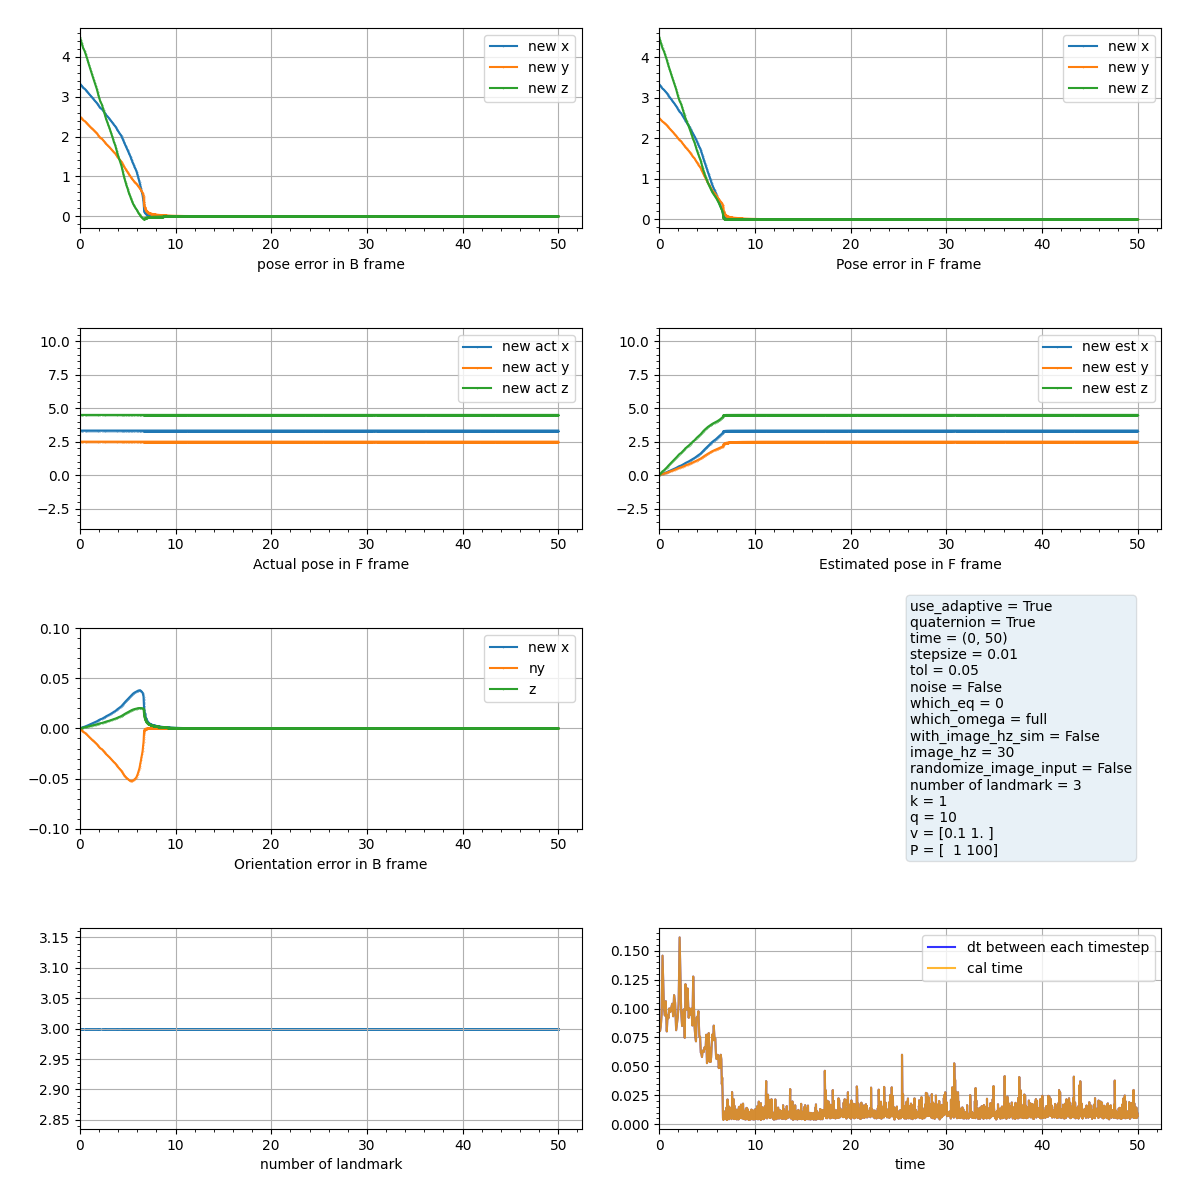

In [3]:
%matplotlib widget
fig, ax, lambda_, p_bar = riccati_obj.visual_plot(figsize=(12,12), bound_y=False)  

In [29]:
np.shape(riccati_obj.solt)

(3781,)

In [33]:
a = np.hstack((lambda_, p_bar, (np.array(riccati_obj.solt).reshape(-1,1)))).flatten()
print(np.shape(a))
b = np.reshape(a, (-1, 8))
print("b", np.shape(b))

(30248,)
b (3781, 8)


In [34]:
import pandas as pd
df = pd.DataFrame(a)
df.to_csv('/home/annika/ITRL/kth_thesis/simulated_result/angular.txt', sep='\t', index=False, header=False)